# Car Price Prediction
#### Project Objective

- ✔ Prepare data and Exploratory data analysis (EDA)
- ✔ Use linear regression for predicting price
- ✔ Understanding the internals of linear regression
- ✔ Evaluating the model with RMSE
- Feature engineering
- Regularization
- Use the model

In [1]:
# Importing libraries.
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot style setup
plt.style.use("tableau-colorblind10")

In [2]:
# Reading data into pandas dataframe using `read_csv()` method of pandas.
car_data = pd.read_csv("data/data.csv")

In [3]:
# Shape of the data
print("Shape::", car_data.shape)

Shape:: (11914, 16)


# Data Preparation

In [4]:
# view first five rows.
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# columns of dataframe
print("Columns::", car_data.columns.tolist())

Columns:: ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


In [6]:
# clean up the columns name.
car_data.columns = car_data.columns.str.lower()
car_data.columns = car_data.columns.str.replace(" ", "_")

In [7]:
# view data
car_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
# Let's change the case of the string values of columns to lower and replace space by '_'.

# Categorical data
categorical_cols = car_data.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    car_data[col] = car_data[col].str.lower().str.replace(" ", "_")

In [9]:
# view first rows of data
car_data.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance","luxury,performance",luxury


In [10]:
# check the datatype of columns using `dtypes` attribute of the pandas dataframe.
car_data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
# check the index of the dataframe using `index` attribute of the pandas dataframe.
car_data.index

RangeIndex(start=0, stop=11914, step=1)

# Exploratory data analysis (EDA)

In [12]:
# check the unique values of columns using `unqiue()` and `nunique()` method of pandas dataframe
for col in car_data.columns:
    print()
    print(f"{col}: {car_data[col].unique()[:5]}")
    print("Number of unqiue values::", car_data[col].nunique())


make: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unqiue values:: 48

model: ['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unqiue values:: 914

year: [2011 2012 2013 1992 1993]
Number of unqiue values:: 28

engine_fuel_type: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unqiue values:: 10

engine_hp: [335. 300. 230. 320. 172.]
Number of unqiue values:: 356

engine_cylinders: [ 6.  4.  5.  8. 12.]
Number of unqiue values:: 9

transmission_type: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unqiue values:: 5

driven_wheels: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unqiue values:: 4

number_of_doors: [ 2.  4.  3. nan]
Number of unqiue values:: 3

market_category: ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
Number of unqiue 

## Missing Data

In [13]:
# Missing data
car_data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

The columns `engine_fuel_type`, `engine_hp`, `engine_cylinders`, and `market_category` have missing values.

## Distriubtion of data

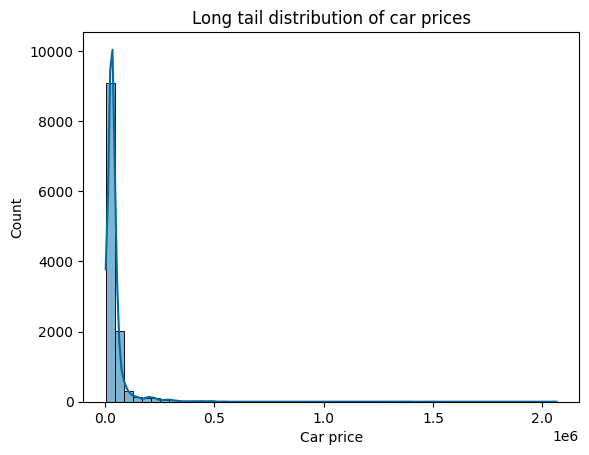

In [14]:
# Let's examine the distriubtion of price of the cars.
sns.histplot(data=car_data, 
             x='msrp', 
             bins=50, kde=True)

plt.title("Long tail distribution of car prices")
plt.xlabel("Car price")
plt.show()

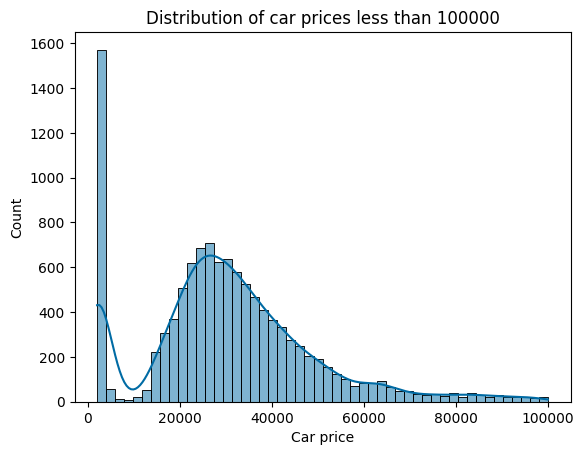

In [15]:
# Let's examine the distribution of the car prices less than $50000
sns.histplot(data = car_data[car_data.msrp < 100000],
             x='msrp', 
             bins=50, kde=True)

plt.title("Distribution of car prices less than 100000")
plt.xlabel("Car price")
plt.show()

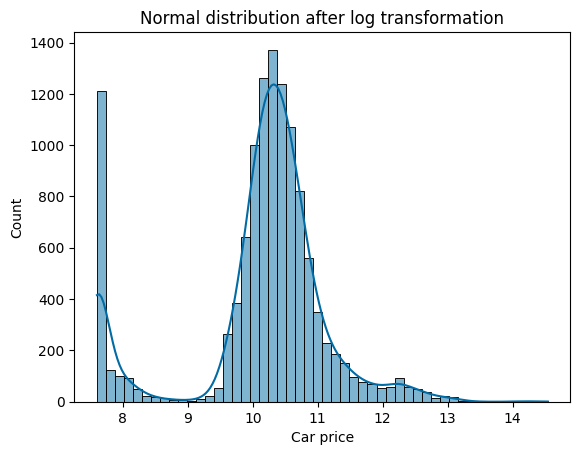

In [16]:
# Log Transformation - to convert the long-tail distribution of target variabel `price` into a normal distribution.
# Log transformation can be performed using `log1p` method of NumPy.
car_data['msrp'] = np.log1p(car_data['msrp'])

# Examine the distribution of the target variable `car price` after log transformation.
sns.histplot(data=car_data, 
             x='msrp', 
             bins=50, kde=True)

plt.title("Normal distribution after log transformation")
plt.xlabel("Car price")
plt.show()

## Split the data

In [33]:
# split the data into X and y
X = car_data.drop('msrp', axis=1)
y = car_data['msrp']

n = car_data.shape[0]

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

# Create and shuffle the index array
idx = np.arange(n)
np.random.shuffle(idx)

# Create train, validation and test set. 
X_train = X.iloc[idx[:n_train]].reset_index(drop=True)
X_val = X.iloc[idx[n_train: n_train+n_val]].reset_index(drop=True)
X_test = X.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = y.iloc[idx[:n_train]].reset_index(drop=True)
y_val = y.iloc[idx[n_train: n_train+n_val]].reset_index(drop=True)
y_test = y.iloc[idx[n_train+n_val:]].reset_index(drop=True)

## Linear Regression
In linear regression, the object is to adjust a line for the data and make predictions on new values. The input of this model is the feature matrix `X` and a `y` vector of predictions is obtained, trying to be as close as possible to the actual `y` values. The linear regression formula is sum of the bias term($w_0$), which refers to the predictions if there is no information, and each of the feature values times their corresponding weights as ($x_{i1}.w_1 + x_{i2}.w_2+... + x_{in}.w_n$)

So, linear regression formula:- $g(x_i) = w_0 + x_{i1}*w_1 + x_{i2}*w_2+... + x_{in}*w_n $

$g(x_i) = w_0 + \sum_{j=0}^n w_j * X_{ij}$

The $( x_{i1}.w_1 + x_{i2}.w_2+... + x_{in}.w_n )$ equation is same as the vector-vector mulitplication. Hence, we can rewrite the equation. $g(x_i) = w_0 + x_{i}^T * w_j$


In [34]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Base Model

In [35]:
# Create a baseline model for car price predictions.
columns = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_nums = X_train[columns].fillna(0)

# model training
w0, w = linear_regression(X_nums, y_train)

# predictions
y_preds = w0 + X_nums.dot(w)

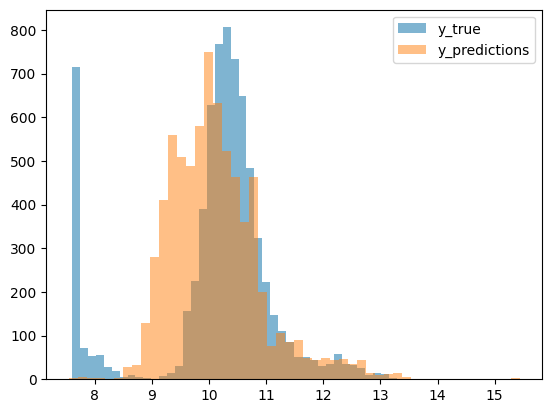

In [36]:
# Visualization
plt.hist(y_train, alpha=0.5, label='y_true', bins=50)
plt.hist(y_preds, alpha=0.5, label='y_predictions', bins=50)
plt.legend()
plt.show()

## Model Evaluation

**Root Mean Squared Error** - $RMSE = \sqrt{\frac{1}n \sum_{i=1}^n (y_{i} - \hat{y_{i}})}$

In [37]:
def rsme(y_true, y_preds):
    err = y_true - y_preds
    result = np.sqrt(np.mean(err**2))
    return result

In [38]:
rsme(y_train, y_preds)

0.7448150882034197

#### Model evaluation on validation test

In [39]:
def prepare_x(df):
    df = df.copy()
    X = df[columns]
    X = X.fillna(0)
    return X.values

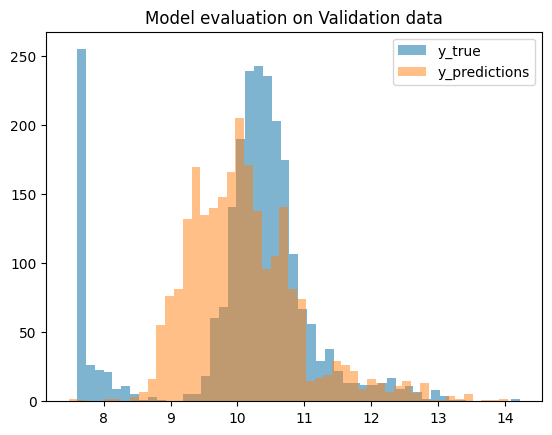

In [24]:
X_num = prepare_x(X_val)
# model training
w0, w = linear_regression(X_num, y_val)

# predictions
y_preds = w0 + X_num.dot(w)

# Visualization
plt.hist(y_val, alpha=0.5, label='y_true', bins=50)
plt.hist(y_preds, alpha=0.5, label='y_predictions', bins=50)
plt.title("Model evaluation on Validation data")
plt.legend()
plt.show()

In [42]:
rsme(y_train, y_preds)

0.5188398209493876

# Feature engineering

In [44]:
def prepare_x(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = columns + ['age']
    X = df[features]
    X = X.fillna(0)
    return X.values

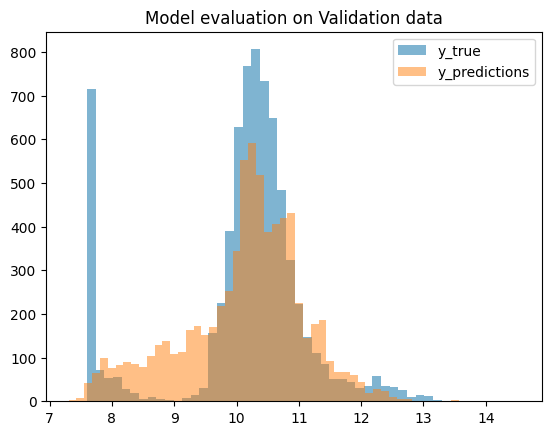

In [45]:
# data preparation
X_nums = prepare_x(X_train)

# model training
w0, w = linear_regression(X_nums, y_train)

# predictions
y_preds = w0 + X_nums.dot(w)

# Visualization
plt.hist(y_train, alpha=0.5, label='y_true', bins=50)
plt.hist(y_preds, alpha=0.5, label='y_predictions', bins=50)
plt.title("Model evaluation on Validation data")
plt.legend()
plt.show()

In [46]:
rsme(y_train, y_preds)

0.5188398209493876

# Categorical Variable

In [49]:
X_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object